In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

np.random.seed(123)

# 6.20 a
# AR(1) n=48, phi=0.7
ar_1 = ArmaProcess(ar=[1, -0.7], ma=[1])
samples = ar_1.generate_sample(48)
# theoretical acf out to 5 lags
acf_t = ar_1.acf(lags=6)
for i, v in enumerate(acf_t):
    print(f"Theoretical ACF({i}) = {v:.3f}")

In [ ]:
import numpy as np

# 6.20 helper functions


# equation 6.1.6
def r1_std_dev(n, phi):
    return np.sqrt((1 / n) * (1 - phi**2))


def r5_std_dev(n, phi):
    return np.sqrt((1 / n) * ((1 + phi**2) / (1 - phi**2)))

In [ ]:
# 6.20 b
from statsmodels.tsa.stattools import acf

# Calculate sample acf
acf_s = acf(samples, nlags=5)
for i, v in enumerate(acf_s):
    print(f"Sample ACF({i}) = {v:.3f}")

t1, t5 = acf_t[1], acf_t[5]
r1, r5 = acf_s[1], acf_s[4]
r1_std_err = r1_std_dev(48, 0.7)
r5_std_err = r5_std_dev(48, 0.7)
print(f"r1 std deviation = {r1_std_err:.3f}")
print(f"r5 std deviation = {r5_std_err:.3f}")
print(f"r1 std error =  {(abs(r1 - t1) / r1_std_err):.3f}")
print(f"r5 std error = {(abs(r5 - t5) / r5_std_err):.3f}")

In [ ]:
# 6.20 c

# theoretical acf out to 5 lags
ar_1 = ArmaProcess(ar=[1, -0.7], ma=[1])
samples = ar_1.generate_sample(48)
acf_t = ar_1.acf(lags=6)
acf_s = acf(samples, nlags=5)
for i, v in enumerate(acf_s):
    print(f"Sample ACF({i}) = {v:3f}")

t1, t5 = acf_t[1], acf_t[5]
r1, r5 = acf_s[1], acf_s[4]
r1_std_err = r1_std_dev(48, 0.7)
r5_std_err = r5_std_dev(48, 0.7)
print(f"r1 std deviation = {r1_std_err:.3f}")
print(f"r5 std deviation = {r5_std_err:.3f}")
print(f"r1 std error =  {(abs(r1 - t1) / r1_std_err):.3f}")
print(f"r5 std error = {(abs(r5 - t5) / r5_std_err):.3f}")

# The precision of the estimate in this simulation is similar to the precision of the previous estimate

In [ ]:
# 6.20 d
import seaborn as sns
import matplotlib.pyplot as plt

r1_list = []
r5_list = []
for i in range(10000):
    ar_1 = ArmaProcess(ar=[1, -0.7], ma=[1])
    samples = ar_1.generate_sample(48)
    acf_s = acf(samples, nlags=5)
    r1_list.append(acf_s[1])
    r5_list.append(acf_s[4])

sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(r1_list, stat="frequency", ax=ax[0])
ax[0].set_title("Historgram of r1")
sns.histplot(r5_list, stat="frequency", ax=ax[1])
ax[1].set_title("Histogram of r5")
plt.tight_layout()

In [ ]:
# 6.28 a
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

np.random.seed(123)
ma_2 = ArmaProcess(ar=[1], ma=[1, -0.7, 0.4])
acf_t = ma_2.acf(lags=21)
for i, v in enumerate(acf_t):
  print(f"Theoretical ACF({i}) = {v:.3f}")


In [ ]:
# 6.28 b
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

samples = ma_2.generate_sample(36)
acf_s = acf(samples, nlags=20)

plot_acf(samples, lags=20)

# The simulated sample only indicates lag 1 is significant, but the theoretical acf indicates that up to lag 2 is significant
# Futhermore, lags past 2 are not strictly zero, but they are all insignificant

In [ ]:
# 6.28 c
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

pacf_t = ma_2.pacf(lags=21)
plt.stem(range(len(pacf_t)), pacf_t)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Theoretical PACF for MA(2) process')


In [ ]:
# 6.28 d
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(samples)
# The sample partical autocorrelation fits well

In [ ]:
# 6.30 a
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)
arma_11 = ArmaProcess(ar=[1, -0.8], ma=[1, -0.4])
acf_t = arma_11.acf(lags=21)
plt.stem(
    range(len(acf_t)),
    acf_t,
)
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.title("Theoretical ACF for ARMA(1,1) process")

In [ ]:
# 6.30 b
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots()
samples = arma_11.generate_sample(nsample=100)
plot_acf(samples, lags=20)

# The theoretical acf takes much longer to decay than the sample acf seems to

In [ ]:
# 6.30 c
from eacf import eacf
eacf(samples)
# The wedge at (1,1) indicates an ARMA(1,1) process is appropriate


In [ ]:
# 6.30 d
from statsmodels.graphics.tsaplots import plot_acf
from eacf import eacf

eacf(samples)
fig, ax = plt.subplots()
samples = arma_11.generate_sample(nsample=100)
plot_acf(samples, lags=20)

In [ ]:
# 6.30 e

from statsmodels.graphics.tsaplots import plot_acf
from eacf import eacf

eacf(samples)
fig, ax = plt.subplots()
samples = arma_11.generate_sample(nsample=48)
plot_acf(samples, lags=20)
# acf decays much more quickly than with 100 and 200 samples
# eacf does not always suggest an ARMA(1,1) process is correct. At times, an AR(1) model is suggested

In [ ]:
# 6.30 f

from statsmodels.graphics.tsaplots import plot_acf
from eacf import eacf

eacf(samples)
fig, ax = plt.subplots()
samples = arma_11.generate_sample(nsample=200)
plot_acf(samples, lags=20)
# eacf indicates an ARMA(1,1) process is sufficient
# acf plot takes longer to decay than cases with fewer samples

In [ ]:
# 6.35 a
import pandas as pd
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv("../datasets/deere3.dat")

ax = df.plot()
ax.set_title("Plot of deere3 dataset")
ax.set_xlabel("Time")

result = adfuller(df["deere3"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

# ADF test indicates that a stationary model is appropriate because the ADF statistic 
# is more negative than the critical values and the p-value < 0.05
# The null hypothesis can be rejected

In [ ]:
# 6.35 b
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(df["deere3"], lags=20)
plot_acf(df["deere3"], lags=20)

# PACF indicates an AR(1) model
# ACF indicates an MA(1) model
# An ARMA(1,1) model may be appropriate

In [ ]:
# 6.36 a
import pandas as pd
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv("../datasets/robot.dat")
ax = df.plot()
ax.set_title("Plot of robot dataset")
ax.set_xlabel("Time")

result = adfuller(df["robot"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

#The data may be stationary, but the second half has more extreme fluctuations than the first
# The p-value from the ADF test is < 0.05, rejecting the null hypothesis and indicating the the data is stationary

In [ ]:
# 6.36 b
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df["robot"], lags=20)
plot_pacf(df["robot"], lags=20)

# The PACF may suggest an AR(2) or AR(3) process, but neither plot is very clear

In [ ]:
# 6.36 c
from eacf import eacf

eacf(df["robot"])
# eacf shows a wedge at (1,1), indicating an ARMA(1,1) may be sufficient

In [60]:
%%capture
%run armasubsets.py

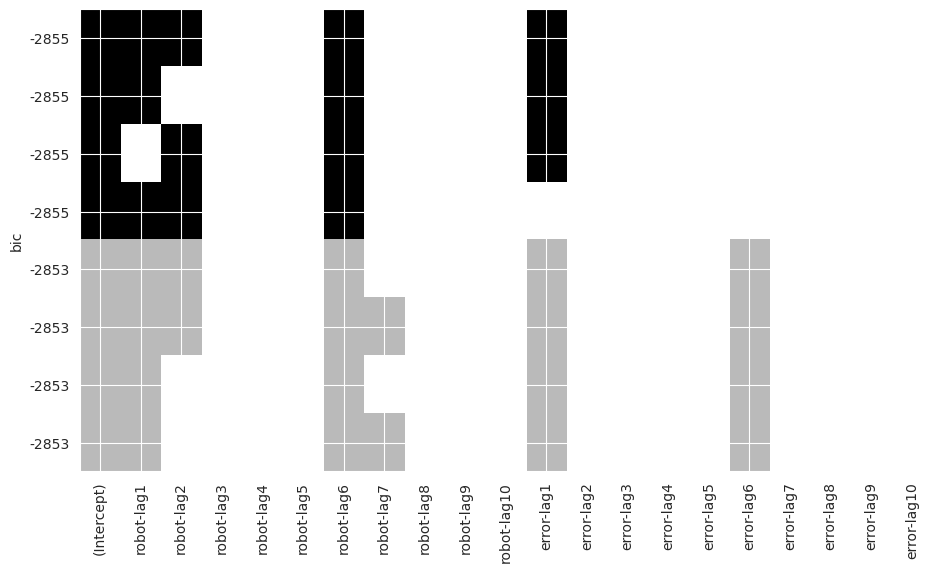

[(-2854.7763504540453,
  ['(Intercept)', 'error-lag1', 'robot-lag1', 'robot-lag2', 'robot-lag6']),
 (-2854.7763504540453,
  ['(Intercept)', 'error-lag1', 'robot-lag1', 'robot-lag6']),
 (-2854.7763504540444,
  ['(Intercept)', 'error-lag1', 'robot-lag2', 'robot-lag6']),
 (-2854.7763504540444,
  ['(Intercept)', 'robot-lag1', 'robot-lag2', 'robot-lag6']),
 (-2852.915591260333,
  ['(Intercept)',
   'error-lag1',
   'error-lag6',
   'robot-lag1',
   'robot-lag2',
   'robot-lag6']),
 (-2852.915591260333,
  ['(Intercept)',
   'error-lag1',
   'error-lag6',
   'robot-lag1',
   'robot-lag2',
   'robot-lag6',
   'robot-lag7']),
 (-2852.915591260333,
  ['(Intercept)', 'error-lag1', 'error-lag6', 'robot-lag1', 'robot-lag6']),
 (-2852.915591260333,
  ['(Intercept)',
   'error-lag1',
   'error-lag6',
   'robot-lag1',
   'robot-lag6',
   'robot-lag7'])]

In [62]:
# 6.36 d
armasubsets(y=df["robot"], nar=10, nma=10, y_name="robot")
# This indicates an ARMA(1,1) model because robot-lag1 and error-lag1 both have the same BIC level